<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/twyncoder/tf-handson-tcb/blob/main/L01_IntroDNN_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

<center><a href="https://centroia.uva.es/"> <img src="logo-UVAIA-original.png" alt="Header" style="width: 300px;"/> </a></center>

# Redes de Aprendizaje Profundo básicas con Keras y Tensorflow.
## *Deep Neural Networks (DNN) para clasificación multi-clase*

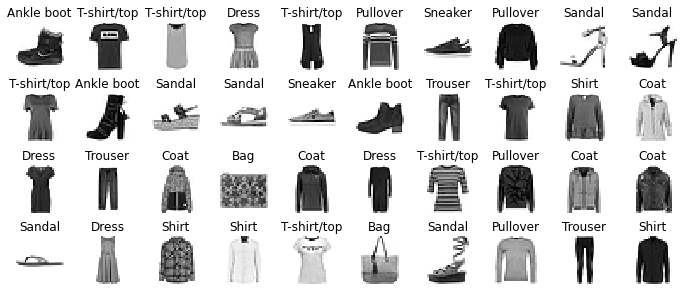

## 0. Preparación del entorno 

In [ ]:
# Common imports
import os
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def print_history(history,title=None, extension='png'):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel("epochs")
    if(title!=None):
        plt.title(title)
        save_fig(title,fig_extension=extension)

### Información de versiones

In [ ]:
tf.__version__

### Comprobar si disponemos de una GPU

In [ ]:
tf.config.list_physical_devices('GPU')

## 1. Inspeccionar los datos y crear subconjuntos train, test, validation

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

**¡AHORA TÚ!** 
- ¿Cuántas muestras tiene el set de entrenamiento? La función `load_data()`devuelve arrays de numpy. Puedes utilizar alguna propiedad de estos arrays para comprobarlo.
- ¿Cuántas tiene el set de test?

In [ ]:
#TODO

Comprobemos el tipo de dato utilizando el atributo `dtype` de numpy.

In [ ]:
X_train_full.dtype

**¡AHORA TÚ!** 
- ¿Qué significa que el tipo de dato `uint8`
- ¿Qué valores puede almacenar y en qué rango?

In [ ]:
#TODO

In [ ]:
y_train_full

**¡AHORA TÚ!** 
- ¿Qué representan `y_train_full` e `y_test`? 
- Utiliza alguna función de numpy para conocer qué posibles valores puede tener

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train_full[0]]

### Crear subconjunto de datos para validación

In [ ]:
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]
print(X_train.shape)

**¡AHORA TÚ! (OPCIONAL)** 
- Prueba otra manera de dividir las señales haciendo uso de `train_test_split()` de scikit-learn.
- Puedes utilizar `shuffle = False` para obtener la misma división entre subconjuntos que arriba

In [ ]:
#TODO

### Normalizar las entradas

In [ ]:
print(X_train[0])

**¡AHORA TÚ!** 
- ¿Qué valores toman los píxeles? ¿Cuál es el valor máximo que puede tomar un píxel?
- Utiliza el valor máximo para normalizar las imágenes en `X_train`, `X_valid` y `X_test`, de manera que tomen valores entre 0 y 1

In [ ]:
#TODO

### Examinar los datos

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
print(class_names[y_train[0]])

**¡AHORA TÚ!** 
- Prueba a observar otras imágenes
- También puedes crear una función para facilitar el trabajo y poder reutilizarla después
- Puedes definirla como `def print_example(image,label):` y después llamarla como se indica más abajo `print_example(X_train[N],y_train[N])`

In [ ]:
#TODO

In [ ]:
N = 5
print_example(X_train[N],y_train[N])

**¡AHORA TÚ! (OPCIONAL)** 
- Busca la diferencia entre cmap "binary" y "gray". Prueba este último.  https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
- Como norma general, en una imagen en escala de grises, un píxel blanco toma valor 255 y un píxel negro toma valor 0
- Examina los valores de los píxeles de alguna imagen ¿Según este criterio el fondo de la imagen sería blanco o negro?
- Quizás quieras añadir la opción `plt.colorbar()`
 en tu función para ver una leyenda de niveles de grises en tus imágenes

In [ ]:
#TODO

## 2. Crear una red neuronal

### 2.1 Regresor lineal simple + softmax

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

**¡AHORA TÚ!** 
- Para el modelo de red neuronal anterior, ¿cómo se calcula el número de parámetros?
- ¿Qué efecto tiene que la función de activación de la última capa sea de tipo 'softmax'?
- ¿Qué beneficio tiene softmax para problemas de clasificación multiclase?

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Esto es equivalente a:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

**¡AHORA TÚ!** 
- Busca información sobre el método compile para responder a las siguientes preguntas.
- ¿Podríamos haber utilizado 'categorical_crossentropy'?
- ¿Qué significa sgd? Busca en la guía de Keras qué otros optimizer podríamos haber empleado.

#### Entrenamiento de la red

In [ ]:
history = model.fit(X_train, y_train, batch_size=8, epochs=10,
                    validation_data=(X_valid, y_valid))

**¡AHORA TÚ!** 
- ¿Qué precisión se está consiguiendo con el set de validación? 
- Dibuja la gráfica con la evolución del entrenamiento. La red neuronal, ¿está aprendiendo correctamente, subajusta o sobreajusta?
- Observa que si vuelves a ejecutar la celda anterior, la red sigue aprendiendo donde lo dejó. Podríamos seguir entrenando, pero este cuasi-modelo de red es muy básico...
- ¡Vamos a ver si podemos crear y entrenar un mejor modelo en la siguiente sección!

In [ ]:
#TODO

### 2.2 Tu primera Deep Neural Network (DNN)

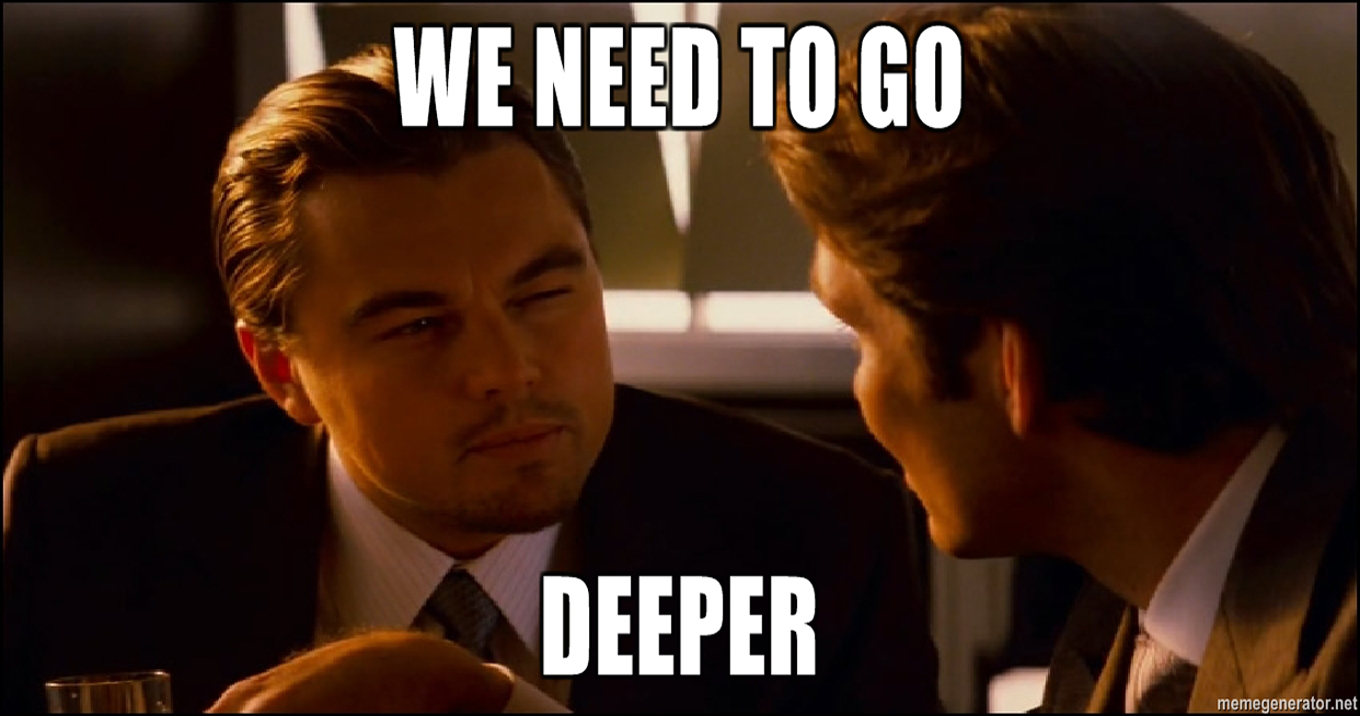

**¡AHORA TÚ!** 
- Crea un nuevo modelo de red `model` e incluye esta vez dos capas intermedias antes de la última capa
- Tienes libertad para elegir el número de neuronas de cada capa (elige valores entre 100 y 500 por ejemplo)
- Utiliza funciones de activación `relu` en lugar de `sigmoid`, ¿sabes explicar por qué?
- ¿Cuántos parámetros tiene el nuevo modelo? Compara este número con el del modelo anterior

In [ ]:
#TODO

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

**¡AHORA TÚ!**
- Entrena la red durante 25 epochs, ¿qué precisión has obtenido esta vez?


In [ ]:
history = model.fit(X_train, y_train, epochs=25,
                    validation_data=(X_valid, y_valid))

#### Visualizando gráficamente la evolución del entrenamiento

**¡AHORA TÚ!**
- Dibuja la gráfica de la evolución del entrenamiento e interpreta las gráficas que has obtenido
- Quizás puedas comparar tus resultados con los obtenidos por otros compañeros

## 3. Test

#### Midiendo el rendimiento con el set de test

In [ ]:
model.evaluate(X_test, y_test)

**¡AHORA TÚ!**
- ¿Qué devuelve el método `model.evaluate()`?
- ¿Cómo se compara el resultado con el obtenido en el set de validación?
- ¿Se ha producido overfitting? Para responder a esta pregunta compara las curvas de _loss_ y _val_loss_  en la gráfica que hicimos antes.

#### Vamos a ver si la red acierta con algunos ejemplos del set de test

In [ ]:
N = 450
X_new = X_test[N:N+10]
y_new = y_test[N:N+10]
print(y_new)
print(X_new.shape)

In [ ]:
y_pred = model.predict(X_new)
print(y_pred.round(2))
print(np.argmax(y_pred,axis=-1))

- Observa que <code>model.predict()</code> espera recibir un array de 3 dimensiones <code>(None, 28, 28)</code> porque la predicción puede ser sobre varias imágenes.
- Ten en cuenta esto cuando quieras proporcionarle una única imagen, puesto que será necesario proporcionar esa dimensión extra.
    ```
    image_new = np.reshape(image,(1,28,28))
    model.predict(image_new)
    ```

**¡AHORA TÚ!**
- ¿Con qué probabilidad se ha predicho la clase de cada una de las imágenes anteriores?
- ¿Alguna de ellas se ha predicho incorrectamente?
- Haz una predicción sobre una ÚNICA de las imágenes de X_test empleando el código del comentario anterior

In [ ]:
N = 0
image = X_test[N]
FIXME
y_pred = model.predict(FIXME)
print(np.argmax(y_pred))

**¡AHORA TÚ! (OPCIONAL)**
- Escribe una función <code>print_prediction(model,image,label)</code> que reciba un ejemplo de test y su etiqueta verdadera.
- Debe poder invocarse con el cóodigo de más abajo
- Además de mostrar la imagen deberá imprimir o devolver la clase inferida en forma de texto.

In [ ]:
#TODO

In [ ]:
N=456
print_prediction(model,X_test[N],y_test[N])

#### Salvemos la red neuronal entrenada en un archivo y veamos cómo cargarla posteriormente

In [ ]:
model.save("L01_MiPrimeraDNN.h5")

In [ ]:
model2 = keras.models.load_model("L01_MiPrimeraDNN.h5")
model2.summary()

In [ ]:
N=5
print_prediction(model2,X_new[N],y_new[N])

## Material de consulta
### API de Keras
- https://keras.io/api/
### Guía de inicio en Keras
- https://www.tensorflow.org/guide/keras/